In [9]:
import datetime
import glob
import os
import os.path as osp
import platform
import pprint
import random
import shlex
import shutil
import signal
import subprocess
import sys
import threading

import numpy as np
import torch
import yaml
from docopt import docopt
import scipy.io as sio
import matplotlib.pyplot as plt

import lcnn
from lcnn.config import C, M
from lcnn.datasets import WireframeDataset, collate
from lcnn.models.line_vectorizer import LineVectorizer
from lcnn.models.multitask_learner import MultitaskHead, MultitaskLearner
from lcnn.models.HT import hough_transform

In [3]:
rootdir = 'D:/dl_mydataset'
split = 'train'
dataset = WireframeDataset(rootdir, split)

number of train: 22116


In [7]:
a = range(10)
[print(i) for i in a[:2]]
a[2:4]

0
1


range(2, 4)

In [20]:
line_tuple.reshape(4, 2)

array([[1.41094317e+01, 2.70200000e+03],
       [2.06198438e+03, 2.70200000e+03],
       [2.04900879e+03, 2.17125069e+02],
       [1.13395390e+00, 2.17125253e+02]])

In [17]:
line_tuple = np.array([[[1.41094317e+01, 2.70200000e+03],
                [2.06198438e+03, 2.70200000e+03]],

                [[2.04900879e+03, 2.17125069e+02],
                [1.13395390e+00, 2.17125253e+02]]])

In [ ]:
a = [tuple(junction) for junction in line_tuple.reshape(4, 2)]

In [31]:
a[0]

(14.1094317, 2702.0)

In [28]:
wireframe_path = "D:\\dl_output\\train\\2022-04-28_13-09-34sep247968000_0_label.npz"
npz_file_path = wireframe_path
npz = np.load(npz_file_path, mmap_mode='r')
for npz_key in npz.keys():
    print(npz_key, ': ', npz[npz_key].shape)  # 4 junctions -> total linked line number is 4*3/2 = 6 (lpos+lneg=6)

aspect_ratio :  ()
jmap :  (1, 128, 128)
joff :  (1, 2, 128, 128)
lmap :  (128, 128)
junc :  (4, 3)
Lpos :  (2, 2)
Lneg :  (4, 2)
lpos :  (2, 2, 3)
lneg :  (4, 2, 3)


In [34]:
a =  [[718, 1, 718, 2064], [2177, 1, 2177, 2064]]
a[0][0]

718

In [ ]:
import time

t = time.process_time()
#do some stuff
elapsed_time = time.process_time() - t

In [ ]:
38080800000.png

In [ ]:
### 1 junction: "jmap"
data = npz["jmap"][0] # (128, 128)
plt.imshow(data, cmap='hot', interpolation='nearest')  # jmap


# for a, b, _ in npz["junc"]:
#     plt.scatter(b, a)
plt.show()

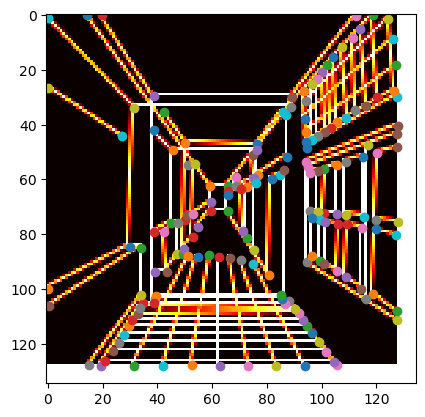

In [75]:
### 1 junction: "lmap" + "junc"
data = npz["lmap"] 
plt.imshow(data, cmap='hot', interpolation='nearest')  # jmap

for a, b, _ in npz["junc"]:
    plt.scatter(b, a)
plt.show()

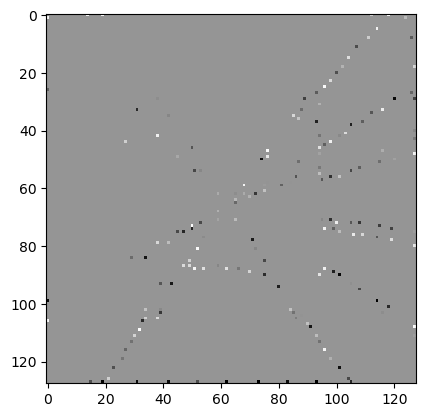

In [94]:
### 1 juctions "joff"
data = npz["joff"][0][0] # (128, 128)
plt.imshow(data, cmap='Greys', interpolation='nearest')  # jmap


# for a, b, _ in npz["junc"]:
#     plt.scatter(b, a)
plt.show()

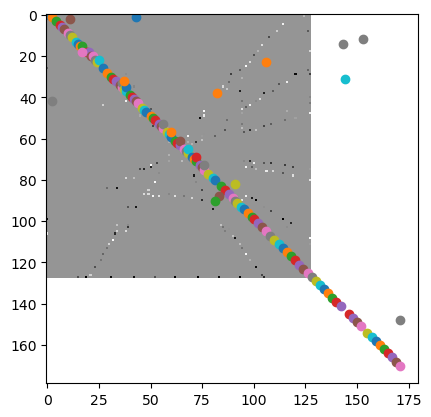

In [105]:
data = npz["joff"][0][0] # (128, 128)
plt.imshow(data, cmap='Greys', interpolation='nearest')  # jmap

for a, b in npz["Lpos"]:
    plt.scatter(b, a)
plt.show()

In [4]:
data = np.array(lines) # (67, 4)

In [7]:
lines = data.reshape(-1, 2, 2)

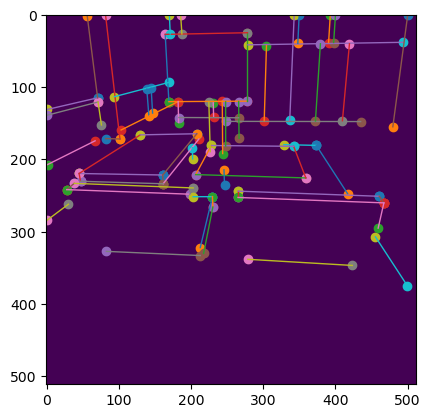

In [21]:
def draw_lines(lines):
    '''the resized image size is (512, 512)

    
    '''
    blank_fig = np.zeros([512, 512])
    plt.imshow(blank_fig)

    for line in lines:
        plt.plot([line[0], line[2]], [line[1], line[3]], linewidth=1) 
        plt.scatter(line[0], line[1])
        plt.scatter(line[2], line[3])
    
    plt.show()

draw_lines(original_lines)

In [14]:
original_lines[0]

[164.16184997558594,
 26.806358337402344,
 169.25286865234375,
 119.97126770019531]

In [23]:
filename = "2022-04-28_16-35-10sep3932063973.png"
(folder, img) = filename.split("sep")


'3932063973.png'